<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
nifty = pd.read_csv('/content/MMI_2021-08-21.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [3]:
nifty.head()

,Date,MMI,Nifty
0,20/08/2021,49.287176,16450.50
1,18/08/2021,53.692127,16568.85
2,17/08/2021,53.572960,16614.60
3,16/08/2021,52.174603,16563.05
4,13/08/2021,49.615676,16529.10


In [4]:
#data = pd.DataFrame({'Date':['13/11/2020'] ,'MMI': [84.6],'Nifty':[12719]})

In [5]:
#nifty= pd.concat([data,nifty],axis=0)
nifty.head()

,Date,MMI,Nifty
0,20/08/2021,49.287176,16450.50
1,18/08/2021,53.692127,16568.85
2,17/08/2021,53.572960,16614.60
3,16/08/2021,52.174603,16563.05
4,13/08/2021,49.615676,16529.10


In [6]:
#len(nifty)

In [7]:
#nifty = nifty.iloc[1200:]

In [8]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [9]:
nifty.head(5)

,Date,MMI,Nifty
0,2021-08-20,49.287176,16450.50
1,2021-08-18,53.692127,16568.85
2,2021-08-17,53.572960,16614.60
3,2021-08-16,52.174603,16563.05
4,2021-08-13,49.615676,16529.10


In [10]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [11]:
nifty= nifty.set_index('Date')

In [12]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [13]:
nifty.head()

,MMI,Nifty
Date,,
2021-08-20,49.287176,16450.50
2021-08-18,53.692127,16568.85
2021-08-17,53.572960,16614.60
2021-08-16,52.174603,16563.05
2021-08-13,49.615676,16529.10


In [14]:
nifty.tail()

,MMI,Nifty
Date,,
2012-03-16,43.219621,5317.90
2012-03-15,52.371887,5380.50
2012-03-14,64.825216,5463.90
2012-03-13,64.145980,5429.50
2012-03-12,60.443328,5359.55


In [15]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [16]:
nifty['macd']=nifty['MMI'][::-1].ewm(span=50, adjust=False).mean()-nifty['MMI'][::-1].ewm(span=200, adjust=False).mean()
nifty['signal']=nifty['macd'].ewm(span=35,adjust=False).mean()
nifty['signal10']=nifty['macd'].ewm(span=10,adjust=False).mean()

In [17]:
nifty['50 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['10 Day'] = nifty['MMI'][::-1].rolling(window=30).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

In [18]:
nifty.head(5)

,MMI,Nifty,macd,signal,signal10,50 Day,10 Day,50ema
Date,,,,,,,,
2021-08-20,49.287176,16450.50,-0.866303,-0.866303,-0.866303,51.300390,46.006750,15930.888055
2021-08-18,53.692127,16568.85,-0.813262,-0.863356,-0.856659,51.824833,46.183460,15909.679404
2021-08-17,53.572960,16614.60,-0.892692,-0.864986,-0.863211,52.330712,46.438703,15882.774482
2021-08-16,52.174603,16563.05,-0.972161,-0.870940,-0.883020,52.788941,46.860174,15852.904053
2021-08-13,49.615676,16529.10,-1.012285,-0.878793,-0.906523,53.326095,47.058971,15823.918504


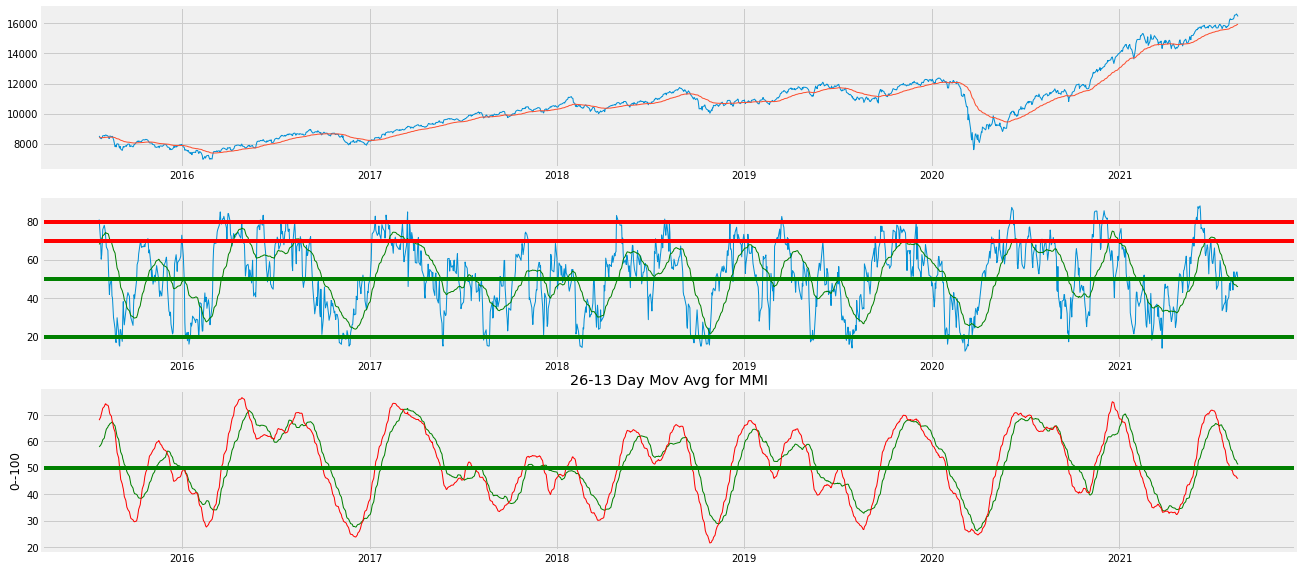

In [19]:
t=1500
fig, ax = plt.subplots(3,1,figsize=(20,10))
ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['MMI'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color='g',linewidth=1 )
ax[2].plot(nifty.index.values[:t],nifty['50 Day'].values[:t],color='g',linewidth=1 )
ax[2].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'r',linewidth=1 )
ax[1].axhline(y=70 , color ='r')
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
ax[2].axhline(y=50 , color= 'g')
plt.title('26-13 Day Mov Avg for MMI')
plt.ylabel('0--100')
fig.savefig('test2png.png', dpi=150)
plt.show()

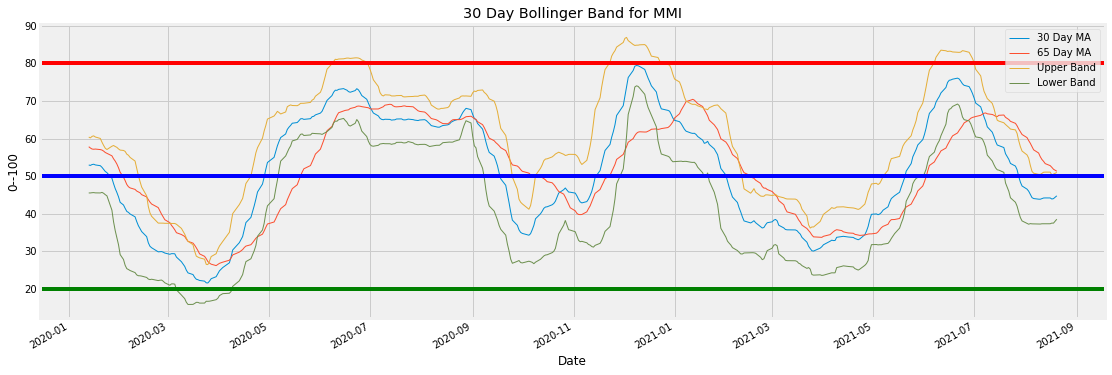

In [20]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
nifty['30 Day MA'] = nifty['MMI'][::-1].rolling(window=21).mean()

nifty['65 Day MA'] = nifty['MMI'][::-1].rolling(window=45).mean()

# set .std(ddof=0) for population std instead of sample
nifty['30 Day STD'] = nifty['MMI'][::-1].rolling(window=21).std() 

nifty['Upper Band'] = nifty['30 Day MA'] + (nifty['30 Day STD'] *.9)
nifty['Lower Band'] = nifty['30 Day MA'] - (nifty['30 Day STD'] *.9)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
nifty[['30 Day MA', '65 Day MA', 'Upper Band', 'Lower Band']][:400].plot(figsize=(17,6),linewidth=1)
plt.axhline(80 , color='r')
plt.axhline(50 , color='b')
plt.axhline(20,color='g')
plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


plt.savefig('bollingerband.png', dpi=150)

plt.show();

In [21]:
weekly_summary = pd.DataFrame()
#weekly_summary['Nifty'] = nifty[' Nifty Index'].resample('W').sum()
#weekly_summary['MMI'] = nifty[' Market Mood Index'].resample('W').sum()

In [22]:
weekly_summary = nifty.resample('W').last()

In [23]:
weekly_summary.tail()

,MMI,Nifty,macd,signal,signal10,50 Day,10 Day,50ema,30 Day MA,65 Day MA,30 Day STD,Upper Band,Lower Band
Date,,,,,,,,,,,,,
2021-07-25,36.312619,15856.05,2.862365,-0.107057,1.075561,64.573616,57.987469,15571.005592,53.369043,64.573616,10.156443,62.509842,44.228244
2021-08-01,38.734858,15763.05,0.153895,-0.745713,-0.488521,61.072908,52.045331,15605.934052,47.372527,61.072908,10.328235,56.667938,38.077115
2021-08-08,49.163690,16238.20,-0.778004,-0.893019,-0.913270,56.994134,49.377448,15707.894044,44.032650,56.994134,7.494688,50.777869,37.287431
2021-08-15,49.615676,16529.10,-1.012285,-0.878793,-0.906523,53.326095,47.058971,15823.918504,44.194474,53.326095,7.633563,51.064681,37.324268
2021-08-22,49.287176,16450.50,-0.866303,-0.866303,-0.866303,51.300390,46.006750,15930.888055,44.759298,51.300390,6.911858,50.979970,38.538626


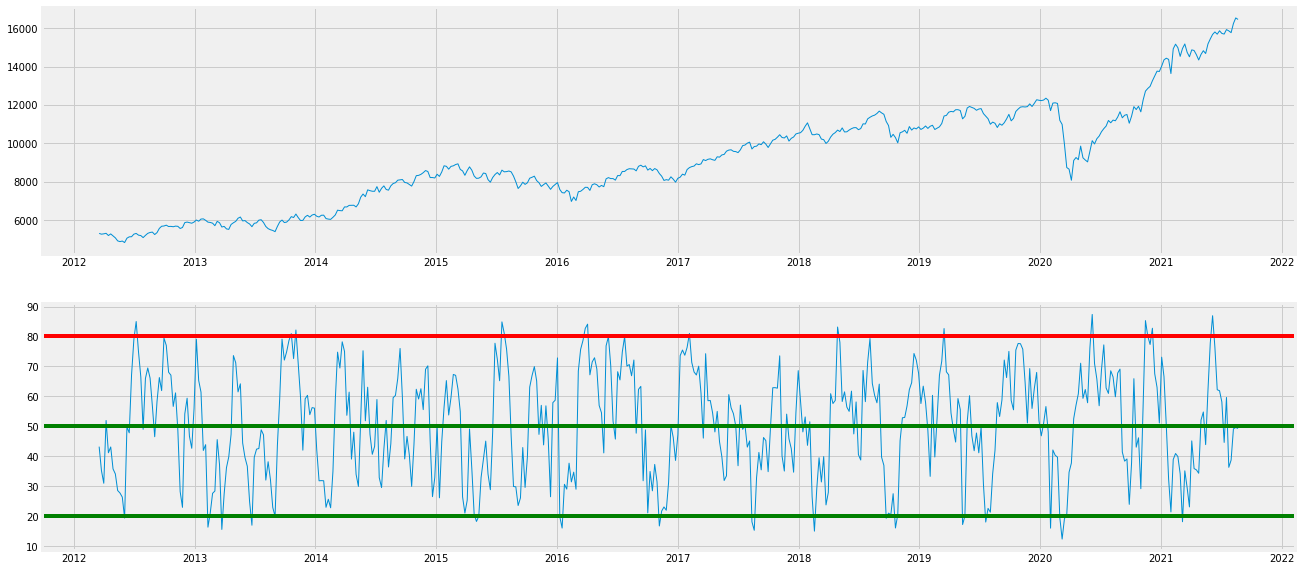

In [24]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1)
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
fig.savefig('testWpng.png', dpi=150)
plt.show()

In [25]:
weekly_summary['13W'] = weekly_summary['MMI'].rolling(window=13).mean()
weekly_summary['26W'] = weekly_summary['MMI'].rolling(window=5).mean()

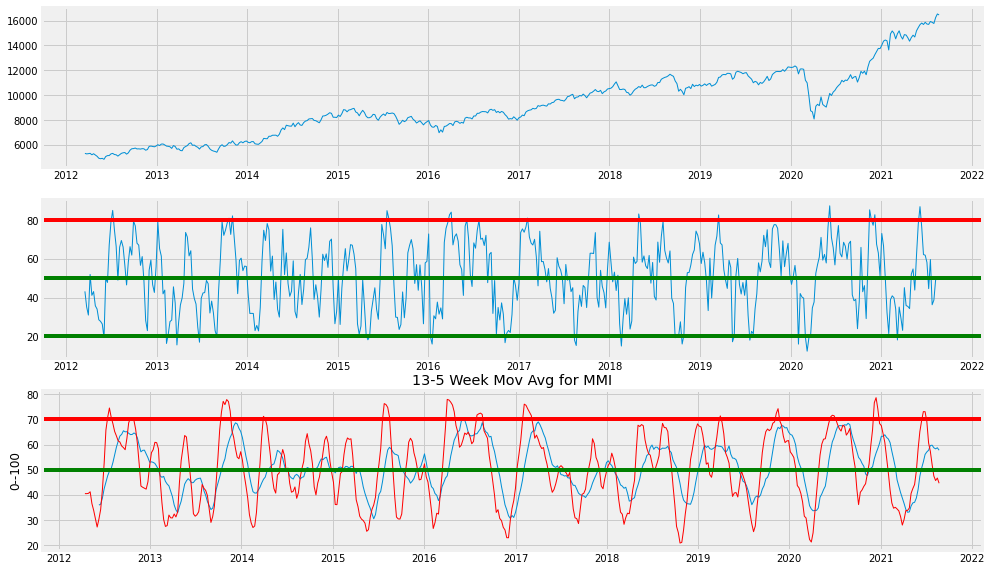

In [26]:
t=200
s=200
fig, ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1 )
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['13W'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['26W'].values,'r',linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
ax[2].axhline(y=50 , color= 'g')
ax[2].axhline(y=70 , color= 'r')
plt.title('13-5 Week Mov Avg for MMI')
plt.ylabel('0--100')
fig.savefig('weekly', dpi=150)
plt.show()

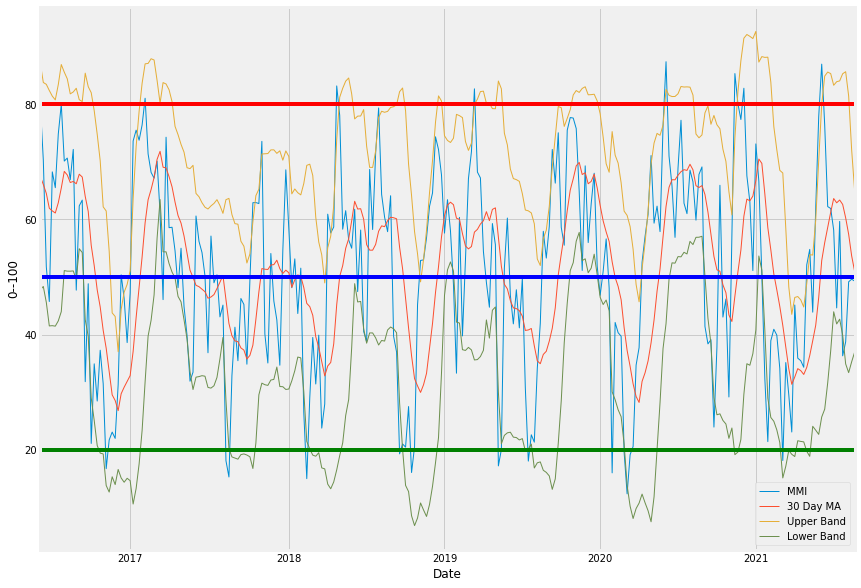

In [27]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band

weekly_summary['30 Day MA'] = weekly_summary['MMI'].rolling(window=10).mean()

# set .std(ddof=0) for population std instead of sample
weekly_summary['30 Day STD'] = weekly_summary['MMI'].rolling(window=10).std() 

weekly_summary['Upper Band'] = weekly_summary['30 Day MA'] + (weekly_summary['30 Day STD'] *1.5)
weekly_summary['Lower Band'] = weekly_summary['30 Day MA'] - (weekly_summary['30 Day STD'] *1.5)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
weekly_summary[['MMI', '30 Day MA', 'Upper Band', 'Lower Band']][220:].plot(figsize=(13,10),linewidth=1)
plt.axhline(80 , color='r')
plt.axhline(50 , color='b')
plt.axhline(20,color='g')
#plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


#plt.savefig('bollingerband.png', dpi=150)

plt.show();